# Matplotlib Homework - The Power of Plots 

## Observations and Insights 

* Capomulin (230) has the highest number of mice receiving its drug regimen, while Propriva (148) has the lowest number of mice. The data also contains 49% female mice and 51% male mice. 


* Infubinol has one outlier because its value lies below 36.83. Infubinol and Ceftamin data points consisted of higher tumor volume at the greatest timepoint compared to the other drug regimens. 


* Mouse ID "f966" showed decreased Tumor Volume (mm3) with the Capomulin Treatment over time. An r-squared value of over 70% indicates that the model explains most of the variability of Capomulin treated mice's average weight versus average tumor volume around its mean. Overall, the weight of a mouse is positively correlated to the volume of the tumor, when treated with the Capomulin regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


* Combine the two csv files and remove and dulpicate data.

In [2]:
# Combine the data into a single dataset
df_combined = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

In [3]:
# Display the data table for preview
df_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice = df_combined["Mouse ID"].nunique()
mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df_combined.loc[df_combined.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
df_duplicate_mice = df_combined.loc[df_combined["Mouse ID"] == "g989", :]
df_duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_new_mice = df_combined[df_combined["Mouse ID"].isin(duplicate_mice) == False]
df_new_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
df_new_mice["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped = df_new_mice.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = regimen_grouped["Tumor Volume (mm3)"].mean()
median = regimen_grouped["Tumor Volume (mm3)"].median()
variance = regimen_grouped["Tumor Volume (mm3)"].var()
std = regimen_grouped["Tumor Volume (mm3)"].std()
sem = regimen_grouped["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.
df_summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance":variance, "Standard Deviation":std, "SEM":sem})
round(df_summary, 3)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
round(df_new_mice.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem']),3)

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.321  50.446  43.852  6.622  0.544
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

## Bar and Pie Charts

* Group the dataframe by the 'Drug Regimen' to determine the number of mice under each regimen.
* Create a bar graph of information using pandas and pyplot.

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_pd = pd.DataFrame(df_new_mice.groupby(["Drug Regimen"]).count()).reset_index()
drug_pd

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,148,148,148,148,148,148,148
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


In [12]:
#Create a new DataFrame with Drug Regimen and Mouse ID
df_drug = drug_pd[["Drug Regimen", "Mouse ID"]]
df_drug = df_drug.set_index("Drug Regimen")

#Sort the values by decending order and rename the 'Mouse ID' column
df_drug = df_drug.sort_values(by='Mouse ID', ascending=False)
df_drug = df_drug.rename(columns={'Mouse ID':'Count'})
df_drug

,Count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


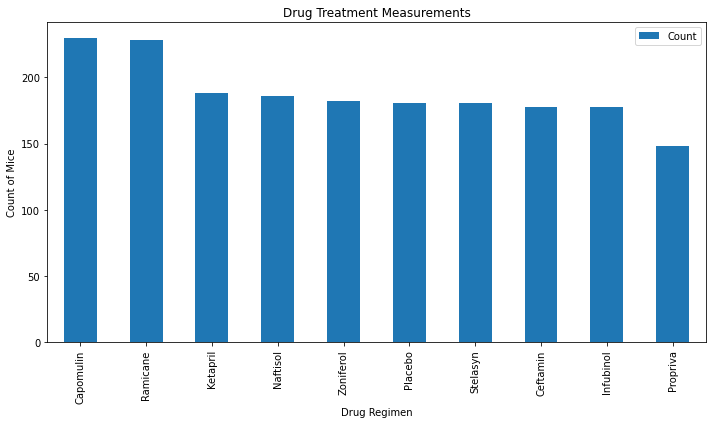

In [13]:
#Create the bar plot with pandas
fig, ax = plt.subplots(figsize=(10,6))
df_drug.plot(kind="bar", ax=ax)

# Set a title and labels for the chart
ax.set_title("Drug Treatment Measurements");
ax.set_ylabel("Count of Mice")
fig.tight_layout();

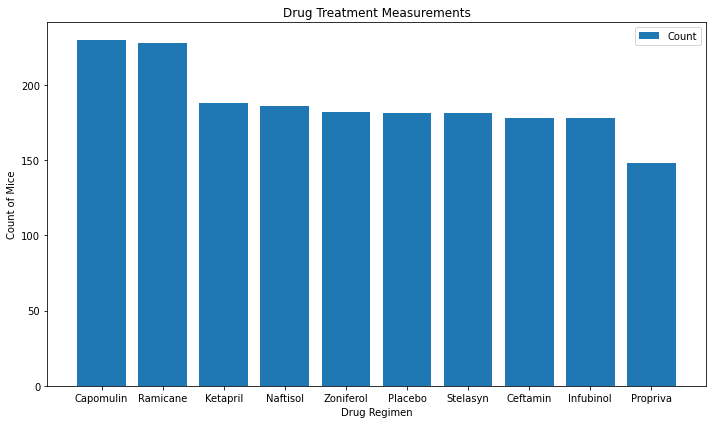

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#Group the cleaned dataframe by 'Drug Regimen' and sort values.
drug_pd_v2 = df_new_mice.groupby(["Drug Regimen"]).count()
drug_pd_v2 = drug_pd_v2.reset_index()
drug_pd_v2 = drug_pd_v2.sort_values(by='Mouse ID', ascending=False)

#Assign values to the x_axis and y_axis
x = drug_pd_v2["Drug Regimen"]
y = drug_pd_v2["Mouse ID"]

#Plot the bar plot using pyplot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, y, label="Count");
ax.set_title('Drug Treatment Measurements');
ax.set_xlabel("Drug Regimen");
ax.set_ylabel("Count of Mice")
ax.legend();
fig.tight_layout();

## Pie plot - Distribution of Female versus Male mice

In [15]:
# Pie plot using pandas 

#Group the cleaned dataframe by 'Sex' and get count of each gender.
df_gender = pd.DataFrame(df_new_mice.groupby(["Sex"]).count()).reset_index()
df_gender

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [16]:
#Condence the dataframe to only 'Sex' and 'Mouse Id' and rename column
df_gender = df_gender[["Sex", "Mouse ID"]]
df_gender = df_gender.rename(columns={"Mouse ID": "Count"})

df_gender

,Sex,Count
0,Female,922
1,Male,958


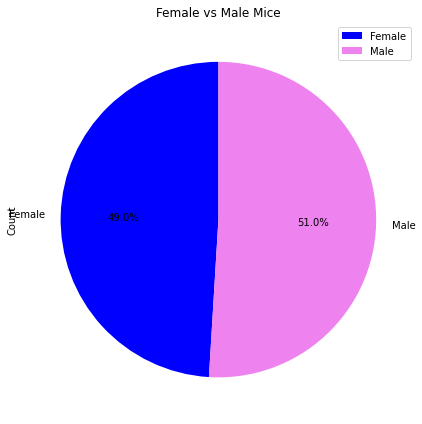

In [17]:
#Pie plot generated using pandas

color = 'blue', 'violet'
fig, ax = plt.subplots(figsize=(6,6))
df_gender.plot(kind="pie", y="Count", ax=ax, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_gender['Sex'], colors=color)
ax.set_title("Female vs Male Mice")

fig.tight_layout();

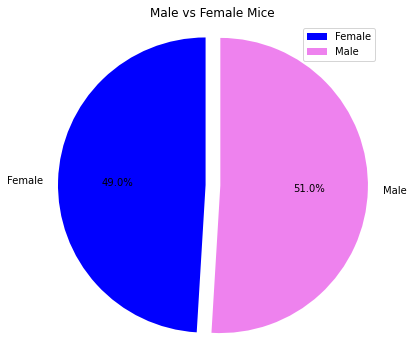

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

#Assign the respective values
labels = df_gender["Sex"]
gender_count = df_gender["Count"]
explode = (0.1, 0)  
color = 'blue', 'violet'

#Generate pie plot using pyplot. 
fig1, ax1 = plt.subplots(figsize=(6,6));
ax1.pie(gender_count, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, colors=color);
ax1.axis('equal'); 
ax1.legend(labels);
ax1.set_title('Male vs Female Mice');
fig.tight_layout();

## Quartiles, Outliers and Boxplots

### Capomulin quartiles, outliers, and boxplots

In [19]:
#Create a new dataframe containing values for only the 'Capomulin' regimen
df_capomulin = df_new_mice.loc[df_new_mice["Drug Regimen"] == "Capomulin",:]

In [20]:
# The last (greatest) timepoint for Capomulin using .max()
capomulin_last = df_capomulin.groupby("Mouse ID").max()["Timepoint"]
df_capomulin_vol = pd.DataFrame(capomulin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(df_capomulin_vol, df_new_mice, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [21]:
#Calculate and print the quartiles, median, and outliers for Capomulin
sort_tumor = capomulin_merge["Tumor Volume (mm3)"]

quartiles = sort_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Regimen Capomulin is: {round(lowerq,2)}")
print(f"The upper quartile of Regimen Capomulin is: {round(upperq,2)}")
print(f"The interquartile range of Regimen Capomulin is: {round(iqr,2)}")
print(f"The the median of Regimen Capomulin is: {round(quartiles[0.5],2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be Regimen Capomulin outliers.")
print(f"Values above {round(upper_bound,2)} could be Regimen Capomulin outliers.")

The lower quartile of Regimen Capomulin is: 32.38
The upper quartile of Regimen Capomulin is: 40.16
The interquartile range of Regimen Capomulin is: 7.78
The the median of Regimen Capomulin is: 38.13 
Values below 20.7 could be Regimen Capomulin outliers.
Values above 51.83 could be Regimen Capomulin outliers.


### Ramicane quartiles, outliers, and boxplots

In [22]:
#Create a new dataframe containing values for only the 'Ramicane' regimen
df_ramicane = df_new_mice.loc[df_new_mice["Drug Regimen"] == "Ramicane",:]

In [23]:
# The last (greatest) timepoint for Ramicane
ramicane_last = df_ramicane.groupby("Mouse ID").max()["Timepoint"]
df_ramicane_vol = pd.DataFrame(ramicane_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_merge = pd.merge(df_ramicane_vol, df_new_mice, on=("Mouse ID", "Timepoint"), how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [24]:
#Extract the tumor volume column
ramicane_tumor = ramicane_merge["Tumor Volume (mm3)"]
ramicane_tumor.head()

0    38.407618
1    43.047543
2    38.810366
3    32.978522
4    38.342008
Name: Tumor Volume (mm3), dtype: float64

In [25]:
#Calculate and print the quartiles, median, and outliers for Ramicane
quartiles = ramicane_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Regimen Ramicane is: {round(lowerq,2)}")
print(f"The upper quartile of Regimen Ramicane is: {round(upperq,2)}")
print(f"The interquartile range of Regimen Ramicane is: {round(iqr,2)}")
print(f"The the median of Regimen Ramicane is: {round(quartiles[0.5],2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be Regimen Ramicane outliers.")
print(f"Values above {round(upper_bound,2)} could be Regimen Ramicane outliers.")

The lower quartile of Regimen Ramicane is: 31.56
The upper quartile of Regimen Ramicane is: 40.66
The interquartile range of Regimen Ramicane is: 9.1
The the median of Regimen Ramicane is: 36.56 
Values below 17.91 could be Regimen Ramicane outliers.
Values above 54.31 could be Regimen Ramicane outliers.


### Influbinol quartiles, outliers, and boxplots

In [26]:
#Create a new dataframe containing values for only the 'Infubinol' regimen
df_infubinol = df_new_mice.loc[df_new_mice["Drug Regimen"] == "Infubinol",:]
df_infubinol.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [27]:
# The last (greatest) timepoint for Infubinol
infubinol_last = df_infubinol.groupby("Mouse ID").max()["Timepoint"]
df_infubinol_vol = pd.DataFrame(infubinol_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infubinol_merge = pd.merge(df_infubinol_vol, df_new_mice, on=("Mouse ID", "Timepoint"), how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [28]:
#Extract the tumor volume column
infubinol_tumor = infubinol_merge["Tumor Volume (mm3)"]
infubinol_tumor.head()

0    67.973419
1    65.525743
2    57.031862
3    66.083066
4    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [29]:
#Calculate and print the quartiles, median, and outliers for Infubinol
quartiles = infubinol_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Regimen Infubinol is: {round(lowerq,2)}")
print(f"The upper quartile of Regimen Infubinol is: {round(upperq,2)}")
print(f"The interquartile range of Regimen Infubinol is: {round(iqr,2)}")
print(f"The the median of Regimen Infubinol is: {round(quartiles[0.5],2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be Regimen Infubinol outliers.")
print(f"Values above {round(upper_bound,2)} could be Regimen Infubinol outliers.")

The lower quartile of Regimen Infubinol is: 54.05
The upper quartile of Regimen Infubinol is: 65.53
The interquartile range of Regimen Infubinol is: 11.48
The the median of Regimen Infubinol is: 60.17 
Values below 36.83 could be Regimen Infubinol outliers.
Values above 82.74 could be Regimen Infubinol outliers.


### Ceftamin quartiles, outliers, boxplots

In [30]:
#Create a new dataframe containing values for only the 'Ceftamin' regimen
df_ceftamin = df_new_mice.loc[df_new_mice["Drug Regimen"] == "Ceftamin",:]
df_ceftamin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [31]:
# The last (greatest) timepoint for Ceftamin
ceftamin_last = df_ceftamin.groupby("Mouse ID").max()["Timepoint"]
df_ceftamin_vol = pd.DataFrame(ceftamin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceftamin_merge = pd.merge(df_ceftamin_vol, df_new_mice, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [32]:
#Extract the tumor volume column
ceftamin_tumor = ceftamin_merge["Tumor Volume (mm3)"]
ceftamin_tumor.head()

0    62.999356
1    45.000000
2    56.057749
3    55.742829
4    48.722078
Name: Tumor Volume (mm3), dtype: float64

In [33]:
#Calculate and print the quartiles, median, and outliers for Ceftamin

quartiles = ceftamin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Regimen Ceftamin is: {round(lowerq,2)}")
print(f"The upper quartile of Regimen Ceftamin is: {round(upperq,2)}")
print(f"The interquartile range of Regimen Ceftamin is: {round(iqr,2)}")
print(f"The the median of Regimen Ceftamin is: {round(quartiles[0.5],2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be Regimen Ceftamin outliers.")
print(f"Values above {round(upper_bound,2)} could be Regimen Ceftamin outliers.")

The lower quartile of Regimen Ceftamin is: 48.72
The upper quartile of Regimen Ceftamin is: 64.3
The interquartile range of Regimen Ceftamin is: 15.58
The the median of Regimen Ceftamin is: 59.85 
Values below 25.36 could be Regimen Ceftamin outliers.
Values above 87.67 could be Regimen Ceftamin outliers.


### Combine the data for the top 4 Regimens and plot a boxplot

In [34]:
#Store the data of the top 4 regimens together
data = [sort_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor]

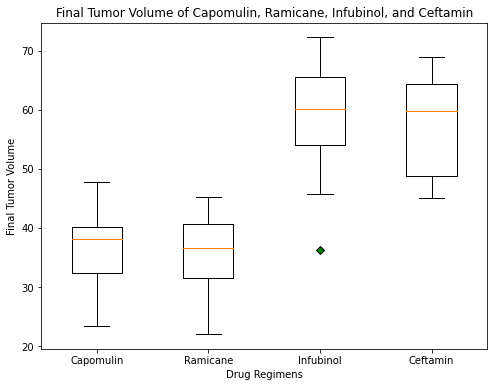

In [48]:
# Plot the four regimens of interest in one plane
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(data, flierprops=green_diamond)

ax.set_xlabel('Drug Regimens')
ax.set_ylabel('Final Tumor Volume')
ax.set_title('Final Tumor Volume of Capomulin, Ramicane, Infubinol, and Ceftamin')
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and Scatter Plots

* Pick a Mouse ID that recieved the Capomulin regimen and plot.

In [36]:
#New DataFrame with one Mouse ID that was given Capomulin
df_capomulin2 = df_capomulin.loc[df_capomulin["Mouse ID"] == "f966",:]
df_capomulin2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
60,f966,Capomulin,Male,16,17,0,45.000000,0
61,f966,Capomulin,Male,16,17,5,38.796474,0
62,f966,Capomulin,Male,16,17,10,35.624403,0
63,f966,Capomulin,Male,16,17,15,32.623003,0
64,f966,Capomulin,Male,16,17,20,30.485985,0


In [37]:
#Condence the dataframe and set 'Timepoint' as the index
df_capomulin2 = df_capomulin2.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
df_capomulin2 = df_capomulin2.reset_index(drop=True)
df_capomulin2 = df_capomulin2.set_index("Timepoint")
df_capomulin2

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,38.796474
10,35.624403
15,32.623003
20,30.485985


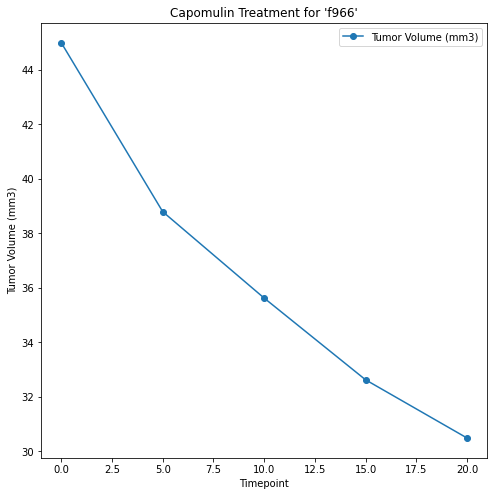

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_capomulin2.plot(figsize=(8,8), marker="o");
plt.title("Capomulin Treatment for 'f966'");
plt.ylabel("Tumor Volume (mm3)");

* Average Tumor Volume vs. Mouse Weight for Capomulin

In [39]:
# Generate a new dataframe with only 'Mouse ID', 'Weight', and 'Tumor Volume'
df_cap3 = df_capomulin.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
df_cap3.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876


In [40]:
# Find the mean of the tumor volume and groupby 'Mouse ID' and 'Weight'
avg_tumor_vol = pd.DataFrame(df_cap3.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_tumor_vol.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [41]:
#Rename the columns and set the index to 'Mouse ID'

avg_tumor_vol = avg_tumor_vol.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
avg_tumor_vol = avg_tumor_vol.set_index("Mouse ID")
avg_tumor_vol.head()

,Weight (g),Average Tumor Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


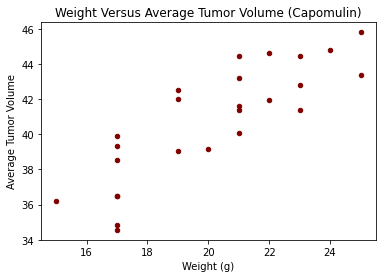

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_vol.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", figsize=(6,4), 
                   title="Weight Versus Average Tumor Volume (Capomulin)", color='maroon');


## Correlation and Regression

In [46]:
# Calculate the correlation coefficient
# for mouse weight and average tumor volume for the Capomulin regimen
mouse = avg_tumor_vol["Weight (g)"]
tumor_volume = avg_tumor_vol["Average Tumor Volume"]
correlation = st.pearsonr(mouse, tumor_volume)
print(f"The correlation between the weight of the mouse and average tumor volume is {round(correlation[0],2)}")

The correlation between the weight of the mouse and average tumor volume is 0.84


The r-squared is: 0.7089


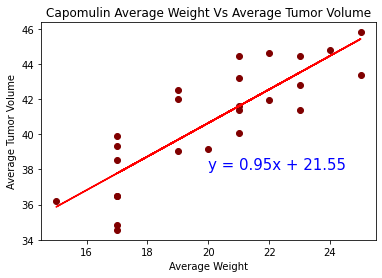

In [44]:
#Calculate linear regression model for mouse weight and average tumor volume
# for the Capmulin regimen
x_values = mouse
y_values = tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='maroon')
plt.plot(x_values,regress_values,"r-");
plt.annotate(line_eq,(20,38),fontsize=15,color="blue")
print(f"The r-squared is: {round(rvalue**2,4)}")
plt.title("Capomulin Average Weight Vs Average Tumor Volume")
plt.xlabel('Average Weight')
plt.ylabel('Average Tumor Volume')
plt.show()